In [38]:
import numpy as np

class Car:
    def __init__(self, max_speed, max_turn_rate, postition=np.array([0.0, 0.0]), speed=0.0, angle=0.0):
        self.position = postition
        self.speed = speed
        self.angle = angle
        self.max_speed = max_speed
        self.max_turn_rate = max_turn_rate

    def accelerate(self, rate):
        self.speed = min(self.speed + rate, self.max_speed)

    def deaccelerate(self, rate):
        self.speed = max(self.speed - rate, 0.0)

    def turn_right(self, rate):
        self.angle -= min(rate, self.max_turn_rate)

    def turn_left(self, rate):
        self.angle += min(rate, self.max_turn_rate)

    def move(self):
        self.position[0] += self.speed * np.cos(self.angle)
        self.position[1] += self.speed * np.sin(self.angle)


class PIDController:
    def __init__(self, P, I, D):
        self.P = P
        self.I = I
        self.D = D
        self.previous_error = 0.0
        self.integral = 0.0

    def get_control_signal(self, error, dt):
        self.integral += error * dt
        derivative = (error - self.previous_error) / dt
        self.previous_error = error
        return self.P * error + self.I * self.integral + self.D * derivative

def run(path, car, controller):
    current_target_index = 0

    last_error = np.inf

    trajectory = []

    iter = 0
    while current_target_index < len(path) and iter < 100:
        error = np.linalg.norm(path[current_target_index] - car.position)

        if error < 0.1:
            current_target_index += 1
            last_error = np.inf
            continue
        
        last_error = error

        control_signal = controller.get_control_signal(error, 1.0)

        if control_signal > 0:
            car.accelerate(control_signal)
        elif control_signal < 0:
            car.deaccelerate(-control_signal)

        angle_to_target = np.arctan2(path[current_target_index][1] - car.position[1],
                                    path[current_target_index][0] - car.position[0])

        angle_error = angle_to_target - car.angle
        
        print(angle_error)

        if angle_error > 0:
            car.turn_left(angle_error)
        else:
            car.turn_right(-angle_error)

        car.move()
        trajectory.append(car.position.copy())
        iter += 1

    return trajectory

0.7853981633974483
1.2502004893595164
2.3297655847885594
-3.6328250167801364
-3.2828242257978832
-3.0546598572115897
-2.868375749530056
-2.7008961101829088
-2.5433217900592746
3.891676587437794
3.5697131918774905
3.2890774862825016
3.038936976392778
2.810381141197229
2.5969163442791867
-3.889252190801675
-3.5919955140005495
-3.3169515307580446
-3.0608497050843475
-2.81991658733882
-2.5906421444323344
3.9131737052737687
3.625026850124127
3.351954229754987
3.0926630390014993
2.845116249560721
2.607065452875055
-3.9068607083463633
-3.624872074422071
-3.3542416009796483
-3.094341040949302
-2.843878869916413
-2.601255197967759
3.9184024284233816
3.6397688221750335
3.370223453877617
3.1094858629834294
2.85668582942113
2.61061746813394
-3.913265742012437
-3.6373740902361344
-3.3690634593486393
-3.1082016280227545
-2.85414668357011
-2.6059347824462473
3.9207602674989035
3.6465955025868664
3.378918382343437
3.1177020542891425
2.862467230567291
2.6124269007457466
-3.916578802535317
-3.6439589212

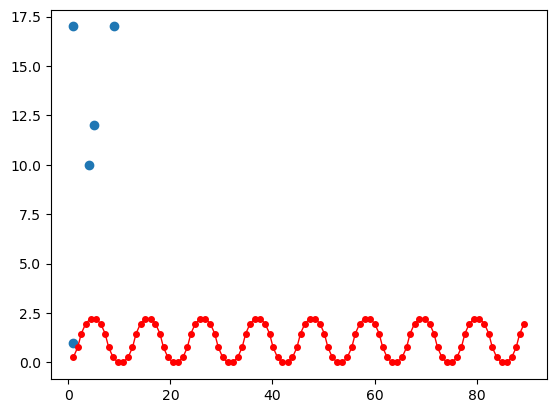

In [39]:
max_speed = 1.0
max_turn_rate = np.pi / 12
P, I, D = 0.1, 0.5, 0.1

car = Car(max_speed, max_turn_rate)
controller = PIDController(P, I, D)

path = np.array([[1, 1], [4, 10], [1, 17], [5, 12], [9, 17]])  # some 2D path

trajectory = run(path, car, controller)

# Plot target points and car trajectory
import matplotlib.pyplot as plt
plt.plot(path[:, 0], path[:, 1], 'o')
plt.plot(np.array(trajectory)[:, 0], np.array(trajectory)[:, 1], 'r-', linewidth=1)
plt.plot(np.array(trajectory)[:, 0], np.array(trajectory)[:, 1], 'ro', markersize=4)
plt.show()

In [34]:
max_speed = 1
max_turn_rate = np.pi / 12
P, I, D = 1, 1, 1

car = Car(max_speed, max_turn_rate, postition=np.array([0.0, 1.5]), speed=0.0, angle=0.0)
controller = PIDController(P, I, D)


variance = .1

x = np.arange(0, 100, 5)
y = np.repeat(1.5, int(100/5)) + np.random.normal(0, variance, int(100/5))

path = np.array([x, y]).T
trajectory = run(path, car, controller)

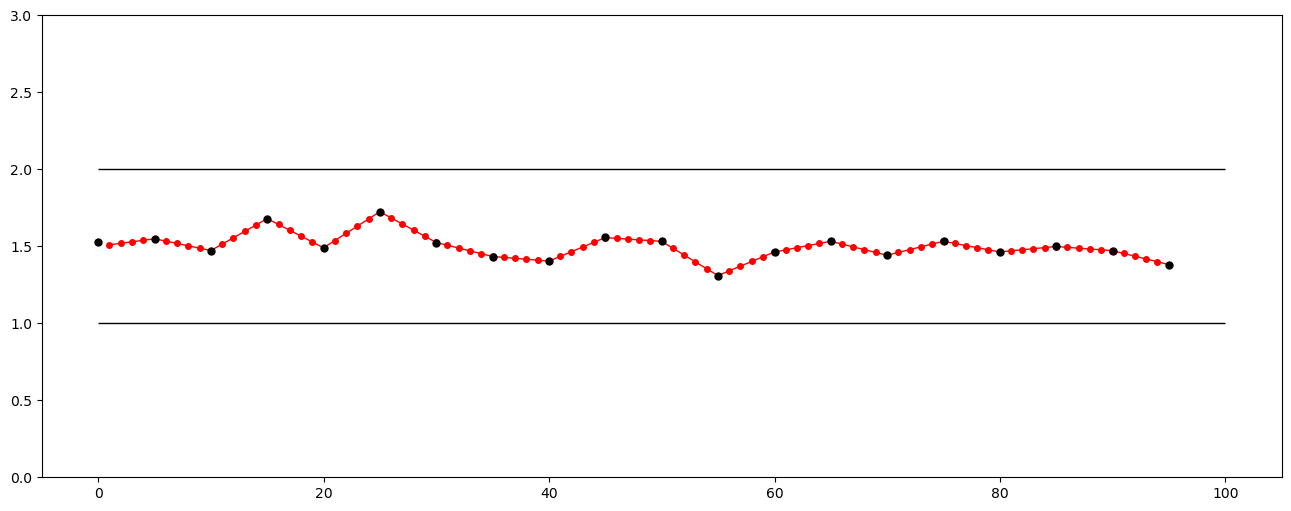

In [35]:
# Plot target points and car trajectory
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16, 6))


ax.plot(np.array(trajectory)[:, 0], np.array(trajectory)[:, 1], 'r-', linewidth=1)
ax.plot(np.array(trajectory)[:, 0], np.array(trajectory)[:, 1], 'ro', markersize=4)
ax.plot(path[:, 0], path[:, 1], 'k.', markersize=10)

ax.hlines(1, 0, 100, color='k', linestyle='solid', linewidth=1)
ax.hlines(2, 0, 100, color='k', linestyle='solid', linewidth=1)

ax.set_xlim(-5, 105)
ax.set_ylim(0, 3)


plt.show()

In [36]:
max_speed = 1
max_turn_rate = np.pi / 16
P, I, D = 0.1, 0.5, 0.1

car = Car(max_speed, max_turn_rate, postition=np.array([0.0, 1.5]), speed=0.0, angle=0.0)
controller = PIDController(P, I, D)


variance = .1

x = np.arange(0, 100, 10)
y = np.repeat(1.5, len(x)) + np.random.normal(0, variance, len(x))

x2 = np.repeat(100, int(10/2))
y2 = np.arange(1.5, 6.5, 1)

x = np.concatenate((x, x2))
y = np.concatenate((y, y2))

path = np.array([x, y]).T

trajectory = run(path, car, controller)

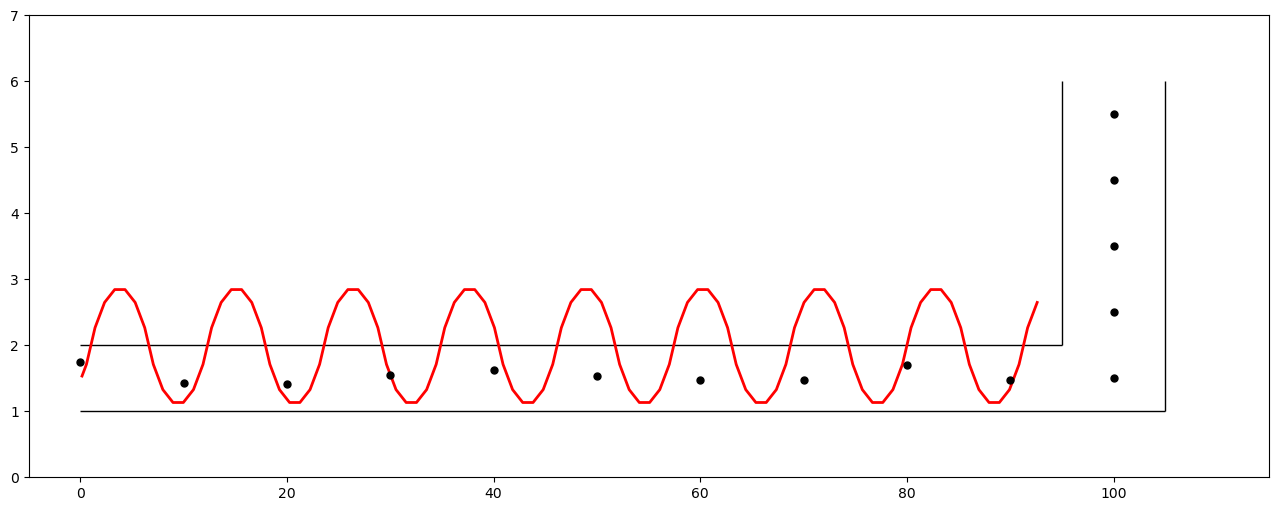

In [37]:
# Plot target points and car trajectory
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(np.array(trajectory)[:, 0], np.array(trajectory)[:, 1], 'r-', linewidth=2)
#ax.plot(np.array(trajectory)[:, 0], np.array(trajectory)[:, 1], 'ro', markersize=4)
ax.plot(path[:, 0], path[:, 1], 'k.', markersize=10)

ax.hlines(1, 0, 105, color='k', linestyle='solid', linewidth=1)
ax.hlines(2, 0, 95, color='k', linestyle='solid', linewidth=1)
ax.vlines(95, 2, 6, color='k', linestyle='solid', linewidth=1)
ax.vlines(105, 1, 6, color='k', linestyle='solid', linewidth=1)

ax.set_xlim(-5, 115)
ax.set_ylim(0, 7)


plt.show()